In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ast

c:\Users\stavr\AppData\Local\Programs\Python\Python37\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
character_metadata = pd.read_csv('./data/character.metadata.tsv', sep='\t', header=None)
movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t', header=None)
name_clusters = pd.read_csv('./data/name.clusters.txt', sep='\t', header=None)
plot_summaries = pd.read_csv('./data/plot_summaries.txt', sep='\t', header=None)
tvtropes = pd.read_csv('./data/tvtropes.clusters.txt', sep='\t', header=None)

In [4]:
columns_movie_metadata = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name',
                          'Movie_release_date','Movie_box_office_revenue','Movie_runtime',
                          'Movie_languages','Movie_countries','Movie_genres']
columns_character_metadata =['Wikipedia_movie_ID','Freebase_movie_ID','Movie_release_date','Character_name',
                             'Actor_DOB','Actor_Gender','Actor_Height', 'Actor_Ethnicity', 'Actor_Name',
                            'Actor_Age_at_Movie_Release', 'Freebase_Character_Actor_Map_ID',
                            'Freebase_Character_ID', 'Freebase_Actor_ID'
]
movie_metadata.columns = columns_movie_metadata
character_metadata.columns = columns_character_metadata
plot_summaries.columns = ['Wikipedia_movie_ID', 'Plot_summary']

In [5]:
movie_metadata.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
character_metadata.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_Character_ID,Freebase_Actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [7]:
character_metadata['Actor_Gender'].isnull().sum()

45609

In [8]:
#Want to check how many of the characters appear in each movie

# Step 1: Merge dataframes on 'Wikipedia_movie_ID'
merged_df = pd.merge(movie_metadata, character_metadata, on=['Wikipedia_movie_ID','Movie_release_date'], how='right')
#find how many null values are in Wikipedia_movie_ID and Actor_gender columns
print(merged_df['Wikipedia_movie_ID'].isnull().sum())
print(merged_df['Character_name'].isnull().sum())
print(merged_df['Actor_Gender'].isnull().sum())


0
257875
45609


In [9]:
#print a row where Actor_Gender is null
merged_df.iloc[merged_df['Actor_Gender'].isnull().values]


,Wikipedia_movie_ID,Freebase_movie_ID_x,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Freebase_movie_ID_y,Character_name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_Character_ID,Freebase_Actor_ID
51,2238856,/m/06yc6v,Me and You and Everyone We Know,2005-01,8012838.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/0219x_"": ""...",/m/06yc6v,Sylvie's Dad,NaN,NaN,NaN,NaN,James Kayten,NaN,/m/0g98dw2,/m/0g98dw5,/m/0g98dwd
82,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",/m/02wjqm,NaN,NaN,NaN,NaN,NaN,Kimmy Suzuki,NaN,/m/0gdk_8c,NaN,/m/0gdk_8f
83,31983669,/m/0g4_n3m,Road to Life,1931-09-30,NaN,104.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/05vz3zq"": ""Soviet Union""}","{""/m/07s9rl0"": ""Drama""}",/m/0g4_n3m,"Lelka, aka 'Merizhka'",NaN,NaN,NaN,NaN,Mariya Gonfa,NaN,/m/0g4_nf5,/m/0g4_ncn,/m/0g4_nck
84,31983669,/m/0g4_n3m,Road to Life,1931-09-30,NaN,104.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/05vz3zq"": ""Soviet Union""}","{""/m/07s9rl0"": ""Drama""}",/m/0g4_n3m,Dandy' Mustapha,1909-03-17,NaN,NaN,NaN,Yvan Kyrlya,22.0,/m/0g4_ndf,/m/0g4_nbm,/m/05zqdwf
85,31983669,/m/0g4_n3m,Road to Life,1931-09-30,NaN,104.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/05vz3zq"": ""Soviet Union""}","{""/m/07s9rl0"": ""Drama""}",/m/0g4_n3m,Nikolai 'Kolka' Rebrov,NaN,NaN,NaN,NaN,Mikhail Dzhagofarov,NaN,/m/0g4_ndk,/m/0g4_nbt,/m/0g4_nbq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450647,12476867,/m/02w7zz8,Spliced,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",/m/02w7zz8,NaN,1982-01-28,NaN,NaN,NaN,Andrea Runge,19.0,/m/0gckh4f,NaN,/m/0gbx_rk
450649,12476867,/m/02w7zz8,Spliced,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",/m/02w7zz8,NaN,NaN,NaN,NaN,NaN,Ariel Bastian,NaN,/m/0gdkb51,NaN,/m/0gdkb55
450650,12476867,/m/02w7zz8,Spliced,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",/m/02w7zz8,NaN,NaN,NaN,NaN,NaN,Jared Van Snellenberg,NaN,/m/0gdndlw,NaN,/m/0gdmxzn
450667,28308153,/m/0cp05t9,Five Clues to Fortune,1957,NaN,129.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction""}",/m/0cp05t9,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [10]:
merged_df.shape

(450669, 20)

In [11]:
merged_df = merged_df.dropna(subset=['Wikipedia_movie_ID', 'Actor_Gender'])
merged_df.shape

(405060, 20)

In [12]:
# Convert the 'Movie release date' column to datetime format
merged_df['Movie_release_date'] = pd.to_datetime(
    merged_df['Movie_release_date'], errors='coerce', utc=True)
merged_df['Actor_DOB'] = pd.to_datetime(
    merged_df['Actor_DOB'], errors='coerce',utc=True)
# Extract the year from the release date
merged_df['Release_year'] = merged_df['Movie_release_date'].dt.year
merged_df['Actor_DOB_year'] = merged_df['Actor_DOB'].dt.year




In [13]:
merged_df.head()

,Wikipedia_movie_ID,Freebase_movie_ID_x,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Freebase_movie_ID_y,...,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_Character_ID,Freebase_Actor_ID,Release_year,Actor_DOB_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",/m/03vyhn,...,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001.0,1958.0
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",/m/03vyhn,...,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,1974.0
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",/m/03vyhn,...,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,1969.0
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",/m/03vyhn,...,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,1967.0
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",/m/03vyhn,...,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,1977.0


In [14]:
#if the Actor_DOB is higher than the Movie_release_date, then the Actor_DOB is invalid so remove these rows
merged_df = merged_df[merged_df['Actor_DOB_year']<merged_df['Release_year']]
merged_df.shape

(332895, 22)

In [15]:
merged_df.groupby('Wikipedia_movie_ID')['Wikipedia_movie_ID'].count()


Wikipedia_movie_ID
330          4
3217        12
3333        14
3746        13
3837        20
            ..
37322106     3
37373877     5
37476824     9
37478048     4
37501922     2
Name: Wikipedia_movie_ID, Length: 58931, dtype: int64

In [16]:
#find how many actors play in each movie
actor_counts = merged_df.groupby('Wikipedia_movie_ID')['Freebase_Actor_ID'].count()
character_counts = merged_df.groupby('Wikipedia_movie_ID')['Freebase_Character_ID'].count()
#check if the actor counts and character counts are the same
print((actor_counts == character_counts).sum())


9936


In [17]:
#find the percentage of female actors for each movie 
perc_female = merged_df.groupby('Wikipedia_movie_ID')['Actor_Gender'].apply(lambda x: (x == 'F').sum()/x.count())
perc_female.head()


Wikipedia_movie_ID
330     1.000000
3217    0.250000
3333    0.428571
3746    0.230769
3837    0.100000
Name: Actor_Gender, dtype: float64

In [18]:
fig_df = pd.merge(actor_counts, perc_female, on='Wikipedia_movie_ID')

In [19]:
merged_df[merged_df['Wikipedia_movie_ID'] == 330]

,Wikipedia_movie_ID,Freebase_movie_ID_x,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Freebase_movie_ID_y,...,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_at_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_Character_ID,Freebase_Actor_ID,Release_year,Actor_DOB_year
144508,330,/m/0ktn59,Actrius,1996-01-01 00:00:00+00:00,NaN,90.0,"{""/m/01m69"": ""Catalan language"", ""/m/06nm1"": ""...","{""/m/06mkj"": ""Spain""}","{""/m/07s9rl0"": ""Drama"", ""/m/01t_vv"": ""Comedy-d...",/m/0ktn59,...,F,NaN,/m/03ttfc,Rosa Maria Sardà,54.0,/m/02vbt4w,NaN,/m/0gh6sw,1996.0,1941.0
144509,330,/m/0ktn59,Actrius,1996-01-01 00:00:00+00:00,NaN,90.0,"{""/m/01m69"": ""Catalan language"", ""/m/06nm1"": ""...","{""/m/06mkj"": ""Spain""}","{""/m/07s9rl0"": ""Drama"", ""/m/01t_vv"": ""Comedy-d...",/m/0ktn59,...,F,NaN,NaN,Mercè Pons,29.0,/m/02vb4j6,NaN,/m/0267qhz,1996.0,1966.0
144510,330,/m/0ktn59,Actrius,1996-01-01 00:00:00+00:00,NaN,90.0,"{""/m/01m69"": ""Catalan language"", ""/m/06nm1"": ""...","{""/m/06mkj"": ""Spain""}","{""/m/07s9rl0"": ""Drama"", ""/m/01t_vv"": ""Comedy-d...",/m/0ktn59,...,F,NaN,NaN,Anna Lizaran,51.0,/m/02vc7_7,NaN,/m/0263499,1996.0,1944.0
144511,330,/m/0ktn59,Actrius,1996-01-01 00:00:00+00:00,NaN,90.0,"{""/m/01m69"": ""Catalan language"", ""/m/06nm1"": ""...","{""/m/06mkj"": ""Spain""}","{""/m/07s9rl0"": ""Drama"", ""/m/01t_vv"": ""Comedy-d...",/m/0ktn59,...,F,NaN,NaN,Núria Espert,60.0,/m/02vbd74,NaN,/m/0263yvy,1996.0,1935.0


Text(0, 0.5, 'female percentage')

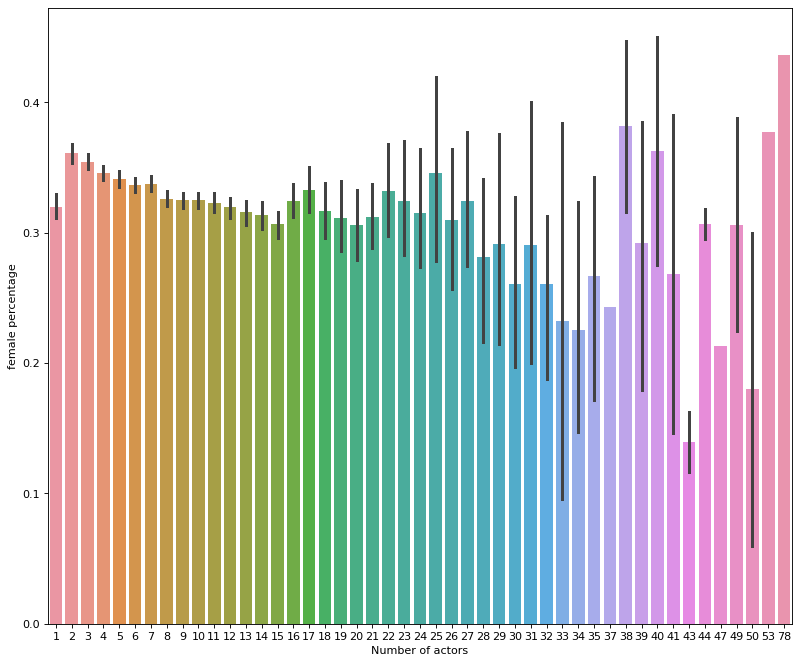

In [20]:
#plot a figure showing the percentage of female actors based on the number of actors in each movie
plt.figure(figsize=(12, 10), dpi=80)
ax = sns.barplot(x="Freebase_Actor_ID", y="Actor_Gender", data=fig_df)
plt.xlabel('Number of actors')
plt.ylabel('female percentage')

In [30]:
#average male and female age at movie release
df_male = merged_df[merged_df['Actor_Gender'] == 'M']
df_female = merged_df[merged_df['Actor_Gender'] == 'F']

avg_male_age = df_male['Actor_Age_at_Movie_Release'].mean()
avg_female_age = df_female['Actor_Age_at_Movie_Release'].mean()
print('Average male age across all movies:', avg_male_age)
print('Average female age across all movies:', avg_female_age)
median_male_age = df_male['Actor_Age_at_Movie_Release'].median()
median_female_age = df_female['Actor_Age_at_Movie_Release'].median()
print('Median male age across all movies:', median_male_age)
print('Median female age across all movies:', median_female_age)

Average male age across all movies: 40.47310220065774
Average female age across all movies: 32.96037775827103
Median male age across all movies: 39.0
Median female age across all movies: 30.0


In [52]:
df_male.dropna(subset=['Actor_Age_at_Movie_Release'], inplace=True)
df_female.dropna(subset = ['Actor_Age_at_Movie_Release'],inplace=True)
df_male = df_male[df_male['Actor_Age_at_Movie_Release']>0]
de_female = df_female[df_female['Actor_Age_at_Movie_Release']>0]

c:\Users\stavr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


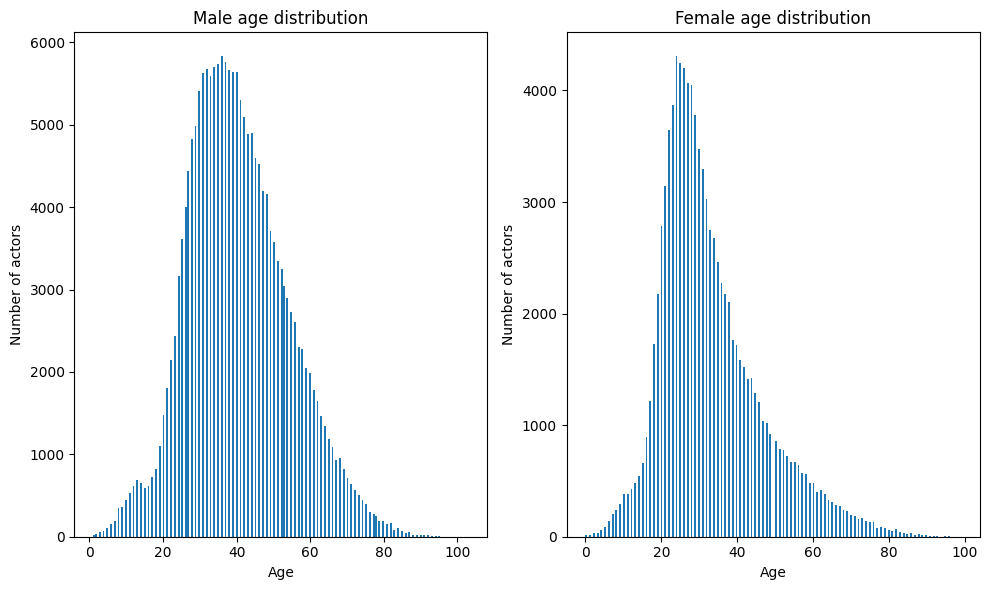

In [53]:
#plot distribution of age of females and males
fig, axs = plt.subplots(1,2, figsize=(10,6))
axs[1].hist(df_female['Actor_Age_at_Movie_Release'], bins=200)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of actors')
axs[1].set_title('Female age distribution')

axs[0].hist(df_male['Actor_Age_at_Movie_Release'], bins=200)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Number of actors')
axs[0].set_title('Male age distribution')

plt.tight_layout()
plt.show()


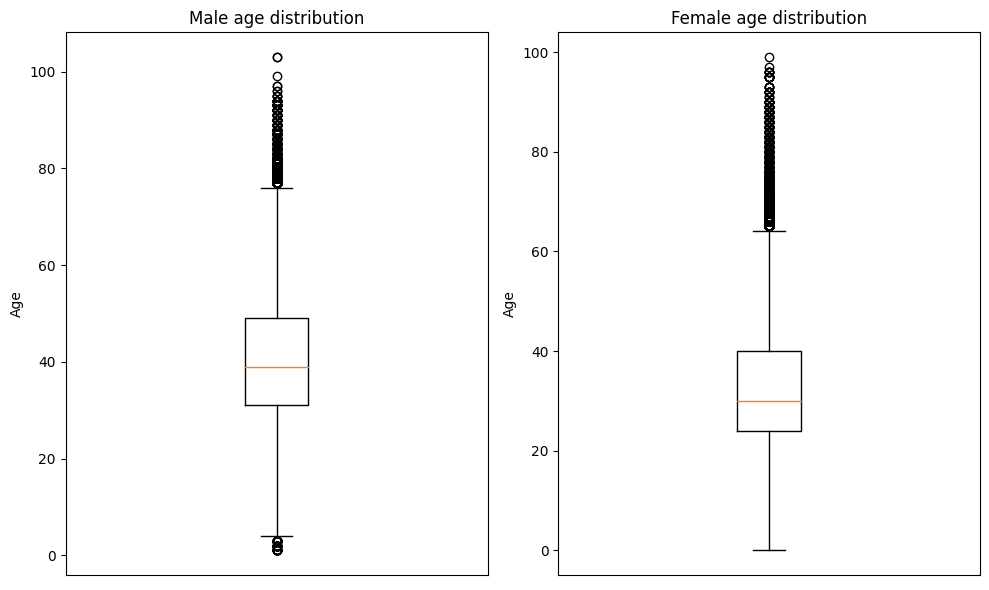

In [54]:
#plot the same with box plots
fig, axs = plt.subplots(1,2, figsize=(10,6))
axs[1].boxplot(df_female['Actor_Age_at_Movie_Release'])
axs[1].set_xticks([])
axs[1].set_ylabel('Age')
axs[1].set_title('Female age distribution')

axs[0].boxplot(df_male['Actor_Age_at_Movie_Release'])
axs[0].set_xticks([])
axs[0].set_ylabel('Age')
axs[0].set_title('Male age distribution')

plt.tight_layout()
plt.show()

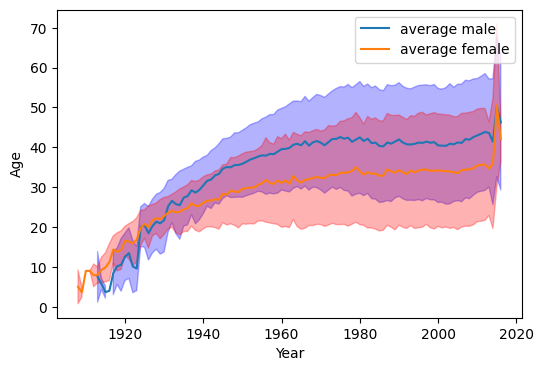

In [65]:
#get the average and mean of the age of actors for each year
avg_age_female_year = df_female.groupby('Release_year')['Actor_Age_at_Movie_Release'].mean()
avg_age_male_year = df_male.groupby('Release_year')['Actor_Age_at_Movie_Release'].mean()
median_age_male_year = df_male.groupby('Release_year')['Actor_Age_at_Movie_Release'].median()
median_age_female_year = df_female.groupby('Release_year')['Actor_Age_at_Movie_Release'].median()
std_age_male_year = df_male.groupby('Release_year')['Actor_Age_at_Movie_Release'].std()
std_age_female_year = df_female.groupby('Release_year')['Actor_Age_at_Movie_Release'].std()
#plot the mean and median of age of actors along the years
plt.figure(figsize=(6,4))
plt.fill_between(avg_age_male_year.index, avg_age_male_year - std_age_male_year, avg_age_male_year + std_age_male_year, alpha=0.3, color='b')
plt.fill_between(avg_age_female_year.index, avg_age_female_year - std_age_female_year, 
                 avg_age_female_year + std_age_female_year, alpha=0.3, color='r')
plt.plot(avg_age_male_year.index, avg_age_male_year, label = 'average male')
plt.plot(avg_age_female_year.index, avg_age_female_year, label = 'average female')
#plt.plot(median_age_male_year.index, median_age_male_year, label = 'median male')
#plt.plot(median_age_female_year.index, median_age_female_year, label = 'median female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

C:\Users\stavr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Release_year', ylabel='Actor_Age_at_Movie_Release'>

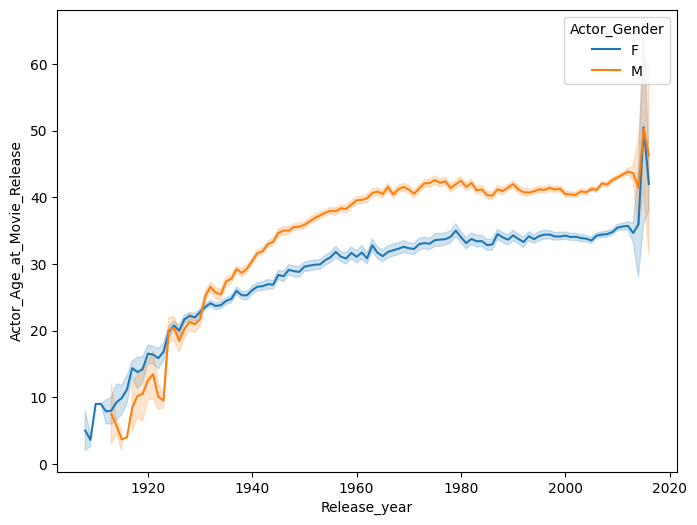

In [66]:
#plot the average age of actors for each year with confidence intervals 95%
plt.figure(figsize=(8,6))
sns.lineplot(data=merged_df, x = 'Release_year', y='Actor_Age_at_Movie_Release', ci = 95,hue = 'Actor_Gender')

In [85]:
#try and find the differences in age between male and female actors for each genre using the reduced genre list 
character_meta_genre = pd.read_csv('./data/character_meta_genre.csv')
def string_to_list(list_string):
    try:
        # This safely evaluates a string as a list
        return ast.literal_eval(list_string)
    except ValueError:
        # In case of error (e.g., empty strings), return an empty list
        return []
character_meta_genre['Genres Reduced'] = character_meta_genre['Genres Reduced'].apply(string_to_list)
character_meta_genre_ = character_meta_genre[character_meta_genre['Movie release date'].notna()]
character_meta_genre_ = character_meta_genre_[character_meta_genre_['Genres Reduced'].notna()]
character_meta_genre_['Genres Reduced'] = character_meta_genre_['Genres Reduced'].apply(tuple)
character_meta_genre_.head()


,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Genres Reduced
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,"(Adventure, Action, Western, Science Fiction, ..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"(Adventure, Action, Western, Science Fiction, ..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"(Adventure, Action, Western, Science Fiction, ..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,"(Adventure, Action, Western, Science Fiction, ..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,"(Adventure, Action, Western, Science Fiction, ..."


In [86]:
# Function that transforms all our dates into one format that maintains only the year
def release_date_format(value): 
    if isinstance(value, str) and value.startswith(('18', '19', '20')): # no movies before 1800
        return value[:4]
    else:
        return pd.NA 

character_meta_genre_['Movie release date'] = character_meta_genre_['Movie release date'].apply(release_date_format)
character_meta_genre_ = character_meta_genre_[character_meta_genre_['Movie release date'].notna()]
character_meta_genre_['Movie release date'] = character_meta_genre_['Movie release date'].apply(lambda x: int(x))
character_meta_genre_exploded = character_meta_genre_.explode('Genres Reduced')
character_meta_genre_exploded = character_meta_genre_exploded[character_meta_genre_exploded['Actor age at movie release']>0]


In [95]:
# For each genre and year count the number of females and males
character_meta_genre_year = character_meta_genre_exploded.groupby(['Movie release date', 
                                                                   'Genres Reduced']).agg(mean_age = ('Actor age at movie release',  
    lambda x: x.mean()),
    std_age = ('Actor age at movie release',
    lambda x: (x.std()))).reset_index()

In [99]:
character_meta_genre_year

,Movie release date,Genres Reduced,mean_age,std_age
0,1908,Black and White,8.000000,NaN
1,1908,Short Film,2.000000,NaN
2,1908,Silent,5.000000,4.242641
3,1909,Black and White,3.600000,1.140175
4,1909,Drama,3.600000,1.140175
...,...,...,...,...
4954,2015,Fantasy,46.333333,16.196707
4955,2015,Fiction,64.750000,21.140404
4956,2015,Science Fiction,56.857143,20.194294
4957,2016,Horror,44.833333,13.570802


In [87]:
male_age_genre_year = character_meta_genre_exploded[character_meta_genre_exploded['Actor gender']=='M'].groupby(
    ['Movie release date', 'Genres Reduced']).agg(mean_age = ('Actor age at movie release',  
    lambda x: x.mean()),
    std_age = ('Actor age at movie release',
    lambda x: (x.std()))).reset_index()

male_age_genre_year.head()

,Movie release date,Genres Reduced,mean_age,std_age
0,1913,Black and White,7.5,6.363961
1,1913,Drama,12.0,NaN
2,1913,Horror,3.0,NaN
3,1913,Science Fiction,3.0,NaN
4,1913,Short Film,3.0,NaN


In [88]:
female_age_genre_year = character_meta_genre_exploded[character_meta_genre_exploded['Actor gender']=='F'].groupby(
    ['Movie release date', 'Genres Reduced']).agg(mean_age = ('Actor age at movie release',  
    lambda x: x.mean()),
    std_age = ('Actor age at movie release',
    lambda x: (x.std()))).reset_index()

female_age_genre_year.head()

,Movie release date,Genres Reduced,mean_age,std_age
0,1908,Black and White,8.0,NaN
1,1908,Short Film,2.0,NaN
2,1908,Silent,5.0,4.242641
3,1909,Black and White,3.6,1.140175
4,1909,Drama,3.6,1.140175


In [89]:
print(male_age_genre_year.shape)
print(male_age_genre_year['mean_age'].isna().sum())
print(female_age_genre_year.shape)
print(female_age_genre_year['mean_age'].isna().sum())

(4801, 4)
0
(4761, 4)
0


In [ ]:
# Make list of unique genres
unique_genres = set(male_age_genre_year['Genres Reduced'].tolist())

In [97]:
character_meta_genre_year_final= character_meta_genre_year.groupby('Genres Reduced').agg(Release_date_list = ('Movie release date', lambda x: list(x)),
                                                                                   mean_age_list = ('mean_age', lambda x: list(x)),
                                                                                    std_age_list = ('std_age', lambda x: list(x) )).reset_index()
character_meta_genre_year_final.head()

,Genres Reduced,Release_date_list,mean_age_list,std_age_list
0,Action,"[1917, 1918, 1920, 1921, 1923, 1924, 1925, 192...","[16.0, 10.0, 13.333333333333334, 18.0, 20.0, 2...","[nan, nan, 5.163977794943222, nan, nan, 2.3804..."
1,Adult,"[1933, 1938, 1940, 1942, 1945, 1951, 1952, 195...","[24.833333333333332, 21.0, 30.142857142857142,...","[3.920034013457877, nan, 5.639993245521116, 8...."
2,Adventure,"[1914, 1917, 1918, 1919, 1920, 1921, 1922, 192...","[12.0, 16.0, 8.5, 17.0, 13.857142857142858, 16...","[nan, nan, 2.1213203435596424, nan, 4.94734175..."
3,Animated,"[1933, 1935, 1939, 1940, 1941, 1942, 1944, 194...","[21.0, 28.5, 27.2, 35.333333333333336, 28.7142...","[nan, 3.696845502136472, 9.984988733093294, 2...."
4,Animation,"[1921, 1923, 1924, 1925, 1929, 1930, 1931, 193...","[19.0, 21.0, 8.8, 17.0, 24.0, 24.4444444444444...","[nan, nan, 3.5637059362410923, 10.440306508910..."


In [100]:


# Group by genre
#For each genre create a new subplot
male_age_genre_year_final= male_age_genre_year.groupby('Genres Reduced').agg(m_Release_date_list = ('Movie release date', lambda x: list(x)),
                                                                                   m_mean_age_list = ('mean_age', lambda x: list(x)),
                                                                                    m_std_age_list = ('std_age', lambda x: list(x) )).reset_index()

male_age_genre_year_final.head()


,Genres Reduced,m_Release_date_list,m_mean_age_list,m_std_age_list
0,Action,"[1918, 1920, 1925, 1926, 1927, 1928, 1929, 193...","[10.0, 9.0, 19.4, 22.142857142857142, 24.75, 2...","[nan, 4.242640687119285, 6.024948132556828, 2...."
1,Adult,"[1933, 1938, 1940, 1942, 1945, 1952, 1953, 195...","[28.0, 21.0, 29.5, 24.666666666666668, 24.5, 3...","[5.656854249492381, nan, 6.363961030678928, 8...."
2,Adventure,"[1918, 1920, 1921, 1923, 1924, 1925, 1926, 192...","[10.0, 9.0, 15.5, 19.0, 23.0, 20.1666666666666...","[nan, 4.242640687119285, 2.1213203435596424, n..."
3,Animated,"[1935, 1939, 1940, 1941, 1942, 1944, 1945, 194...","[31.5, 33.666666666666664, 35.333333333333336,...","[2.1213203435596424, 3.511884584284246, 2.3094..."
4,Animation,"[1923, 1924, 1925, 1929, 1930, 1932, 1933, 193...","[21.0, 11.333333333333334, 24.0, 27.0, 26.0, 3...","[nan, 1.1547005383792517, nan, 0.0, 2.91547594..."


In [101]:
# Group by genre
#For each genre create a new subplot
female_age_genre_year_final= female_age_genre_year.groupby('Genres Reduced').agg(f_Release_date_list = ('Movie release date', lambda x: list(x)),
                                                                                   f_mean_age_list = ('mean_age', lambda x: list(x)),
                                                                                    f_std_age_list = ('std_age', lambda x: list(x) )).reset_index()

female_age_genre_year_final.head()

,Genres Reduced,f_Release_date_list,f_mean_age_list,f_std_age_list
0,Action,"[1917, 1920, 1921, 1923, 1924, 1925, 1926, 192...","[16.0, 15.5, 18.0, 20.0, 21.5, 22.6, 22.7, 21....","[nan, 4.43471156521669, nan, nan, 2.3804761428..."
1,Adult,"[1933, 1940, 1942, 1945, 1951, 1952, 1953, 195...","[23.25, 30.4, 25.333333333333332, 43.0, 15.0, ...","[2.217355782608345, 6.107372593840989, 8.96288..."
2,Adventure,"[1914, 1917, 1918, 1919, 1920, 1921, 1922, 192...","[12.0, 16.0, 7.0, 17.0, 15.25, 17.5, 18.5, 20....","[nan, nan, nan, nan, 4.349329450233296, 0.7071..."
3,Animated,"[1933, 1935, 1939, 1941, 1942, 1944, 1945, 194...","[21.0, 25.5, 17.5, 28.666666666666668, 24.8333...","[nan, 0.7071067811865476, 7.7781745930520225, ..."
4,Animation,"[1921, 1924, 1925, 1929, 1930, 1931, 1932, 193...","[19.0, 5.0, 13.5, 18.0, 22.5, 22.0, 23.1818181...","[nan, 0.0, 12.020815280171307, nan, 1.91485421..."


In [102]:
data_for_plots_genre = pd.merge(male_age_genre_year_final,female_age_genre_year_final, on='Genres Reduced', how='outer')
data_for_plots_genre.head()

,Genres Reduced,m_Release_date_list,m_mean_age_list,m_std_age_list,f_Release_date_list,f_mean_age_list,f_std_age_list
0,Action,"[1918, 1920, 1925, 1926, 1927, 1928, 1929, 193...","[10.0, 9.0, 19.4, 22.142857142857142, 24.75, 2...","[nan, 4.242640687119285, 6.024948132556828, 2....","[1917, 1920, 1921, 1923, 1924, 1925, 1926, 192...","[16.0, 15.5, 18.0, 20.0, 21.5, 22.6, 22.7, 21....","[nan, 4.43471156521669, nan, nan, 2.3804761428..."
1,Adult,"[1933, 1938, 1940, 1942, 1945, 1952, 1953, 195...","[28.0, 21.0, 29.5, 24.666666666666668, 24.5, 3...","[5.656854249492381, nan, 6.363961030678928, 8....","[1933, 1940, 1942, 1945, 1951, 1952, 1953, 195...","[23.25, 30.4, 25.333333333333332, 43.0, 15.0, ...","[2.217355782608345, 6.107372593840989, 8.96288..."
2,Adventure,"[1918, 1920, 1921, 1923, 1924, 1925, 1926, 192...","[10.0, 9.0, 15.5, 19.0, 23.0, 20.1666666666666...","[nan, 4.242640687119285, 2.1213203435596424, n...","[1914, 1917, 1918, 1919, 1920, 1921, 1922, 192...","[12.0, 16.0, 7.0, 17.0, 15.25, 17.5, 18.5, 20....","[nan, nan, nan, nan, 4.349329450233296, 0.7071..."
3,Animated,"[1935, 1939, 1940, 1941, 1942, 1944, 1945, 194...","[31.5, 33.666666666666664, 35.333333333333336,...","[2.1213203435596424, 3.511884584284246, 2.3094...","[1933, 1935, 1939, 1941, 1942, 1944, 1945, 194...","[21.0, 25.5, 17.5, 28.666666666666668, 24.8333...","[nan, 0.7071067811865476, 7.7781745930520225, ..."
4,Animation,"[1923, 1924, 1925, 1929, 1930, 1932, 1933, 193...","[21.0, 11.333333333333334, 24.0, 27.0, 26.0, 3...","[nan, 1.1547005383792517, nan, 0.0, 2.91547594...","[1921, 1924, 1925, 1929, 1930, 1931, 1932, 193...","[19.0, 5.0, 13.5, 18.0, 22.5, 22.0, 23.1818181...","[nan, 0.0, 12.020815280171307, nan, 1.91485421..."


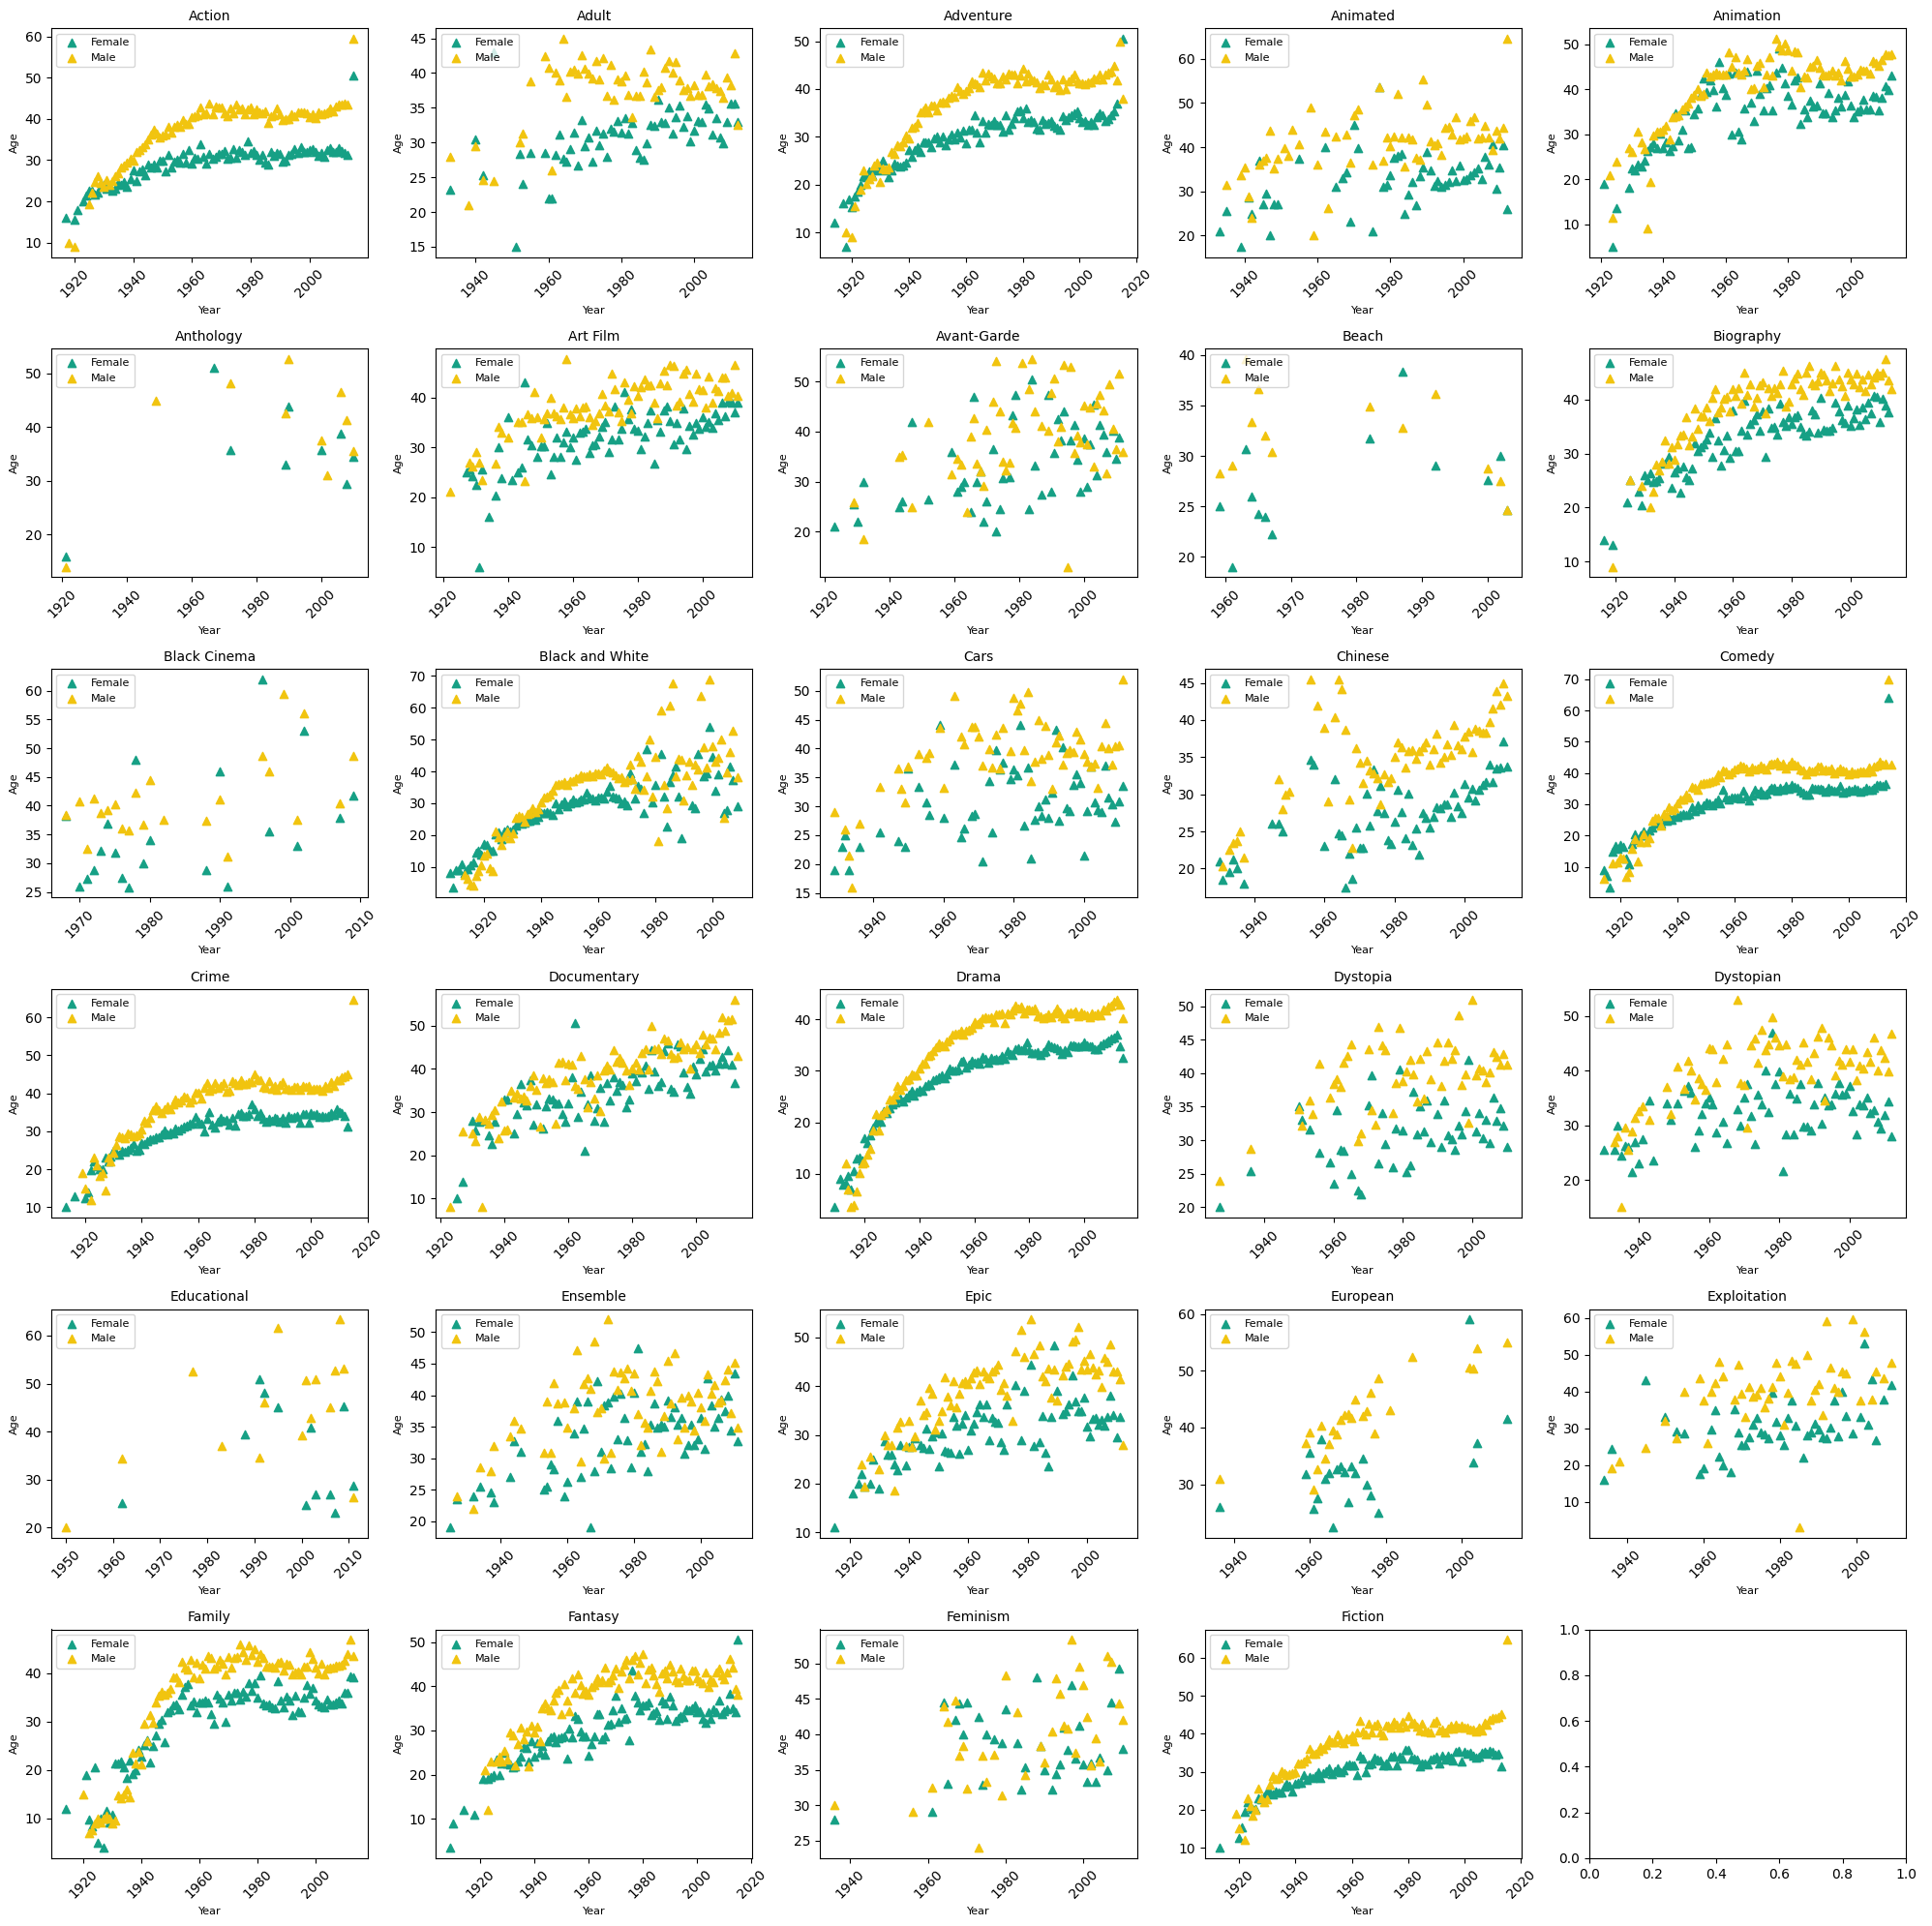

In [105]:
# Make function to create plot for subset of genres because we have 77 of them
def plot_genres(data, start_idx, end_idx):
    fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20,20))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    for (idx, row), ax in zip(data.iloc[start_idx:end_idx].iterrows(), axs.flatten()):
        ax.scatter(row['f_Release_date_list'], row['f_mean_age_list'], color='#16A085', label='Female', marker = '^')
        ax.scatter(row['m_Release_date_list'], row['m_mean_age_list'], color='#F1C40F', label='Male', marker = '^')
        ax.set_title(row['Genres Reduced'], fontsize=10)
        ax.set_xlabel('Year', fontsize=8)
        ax.set_ylabel('Age', fontsize=8)
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()

plot_1 = plot_genres(data_for_plots_genre, 0, 29)

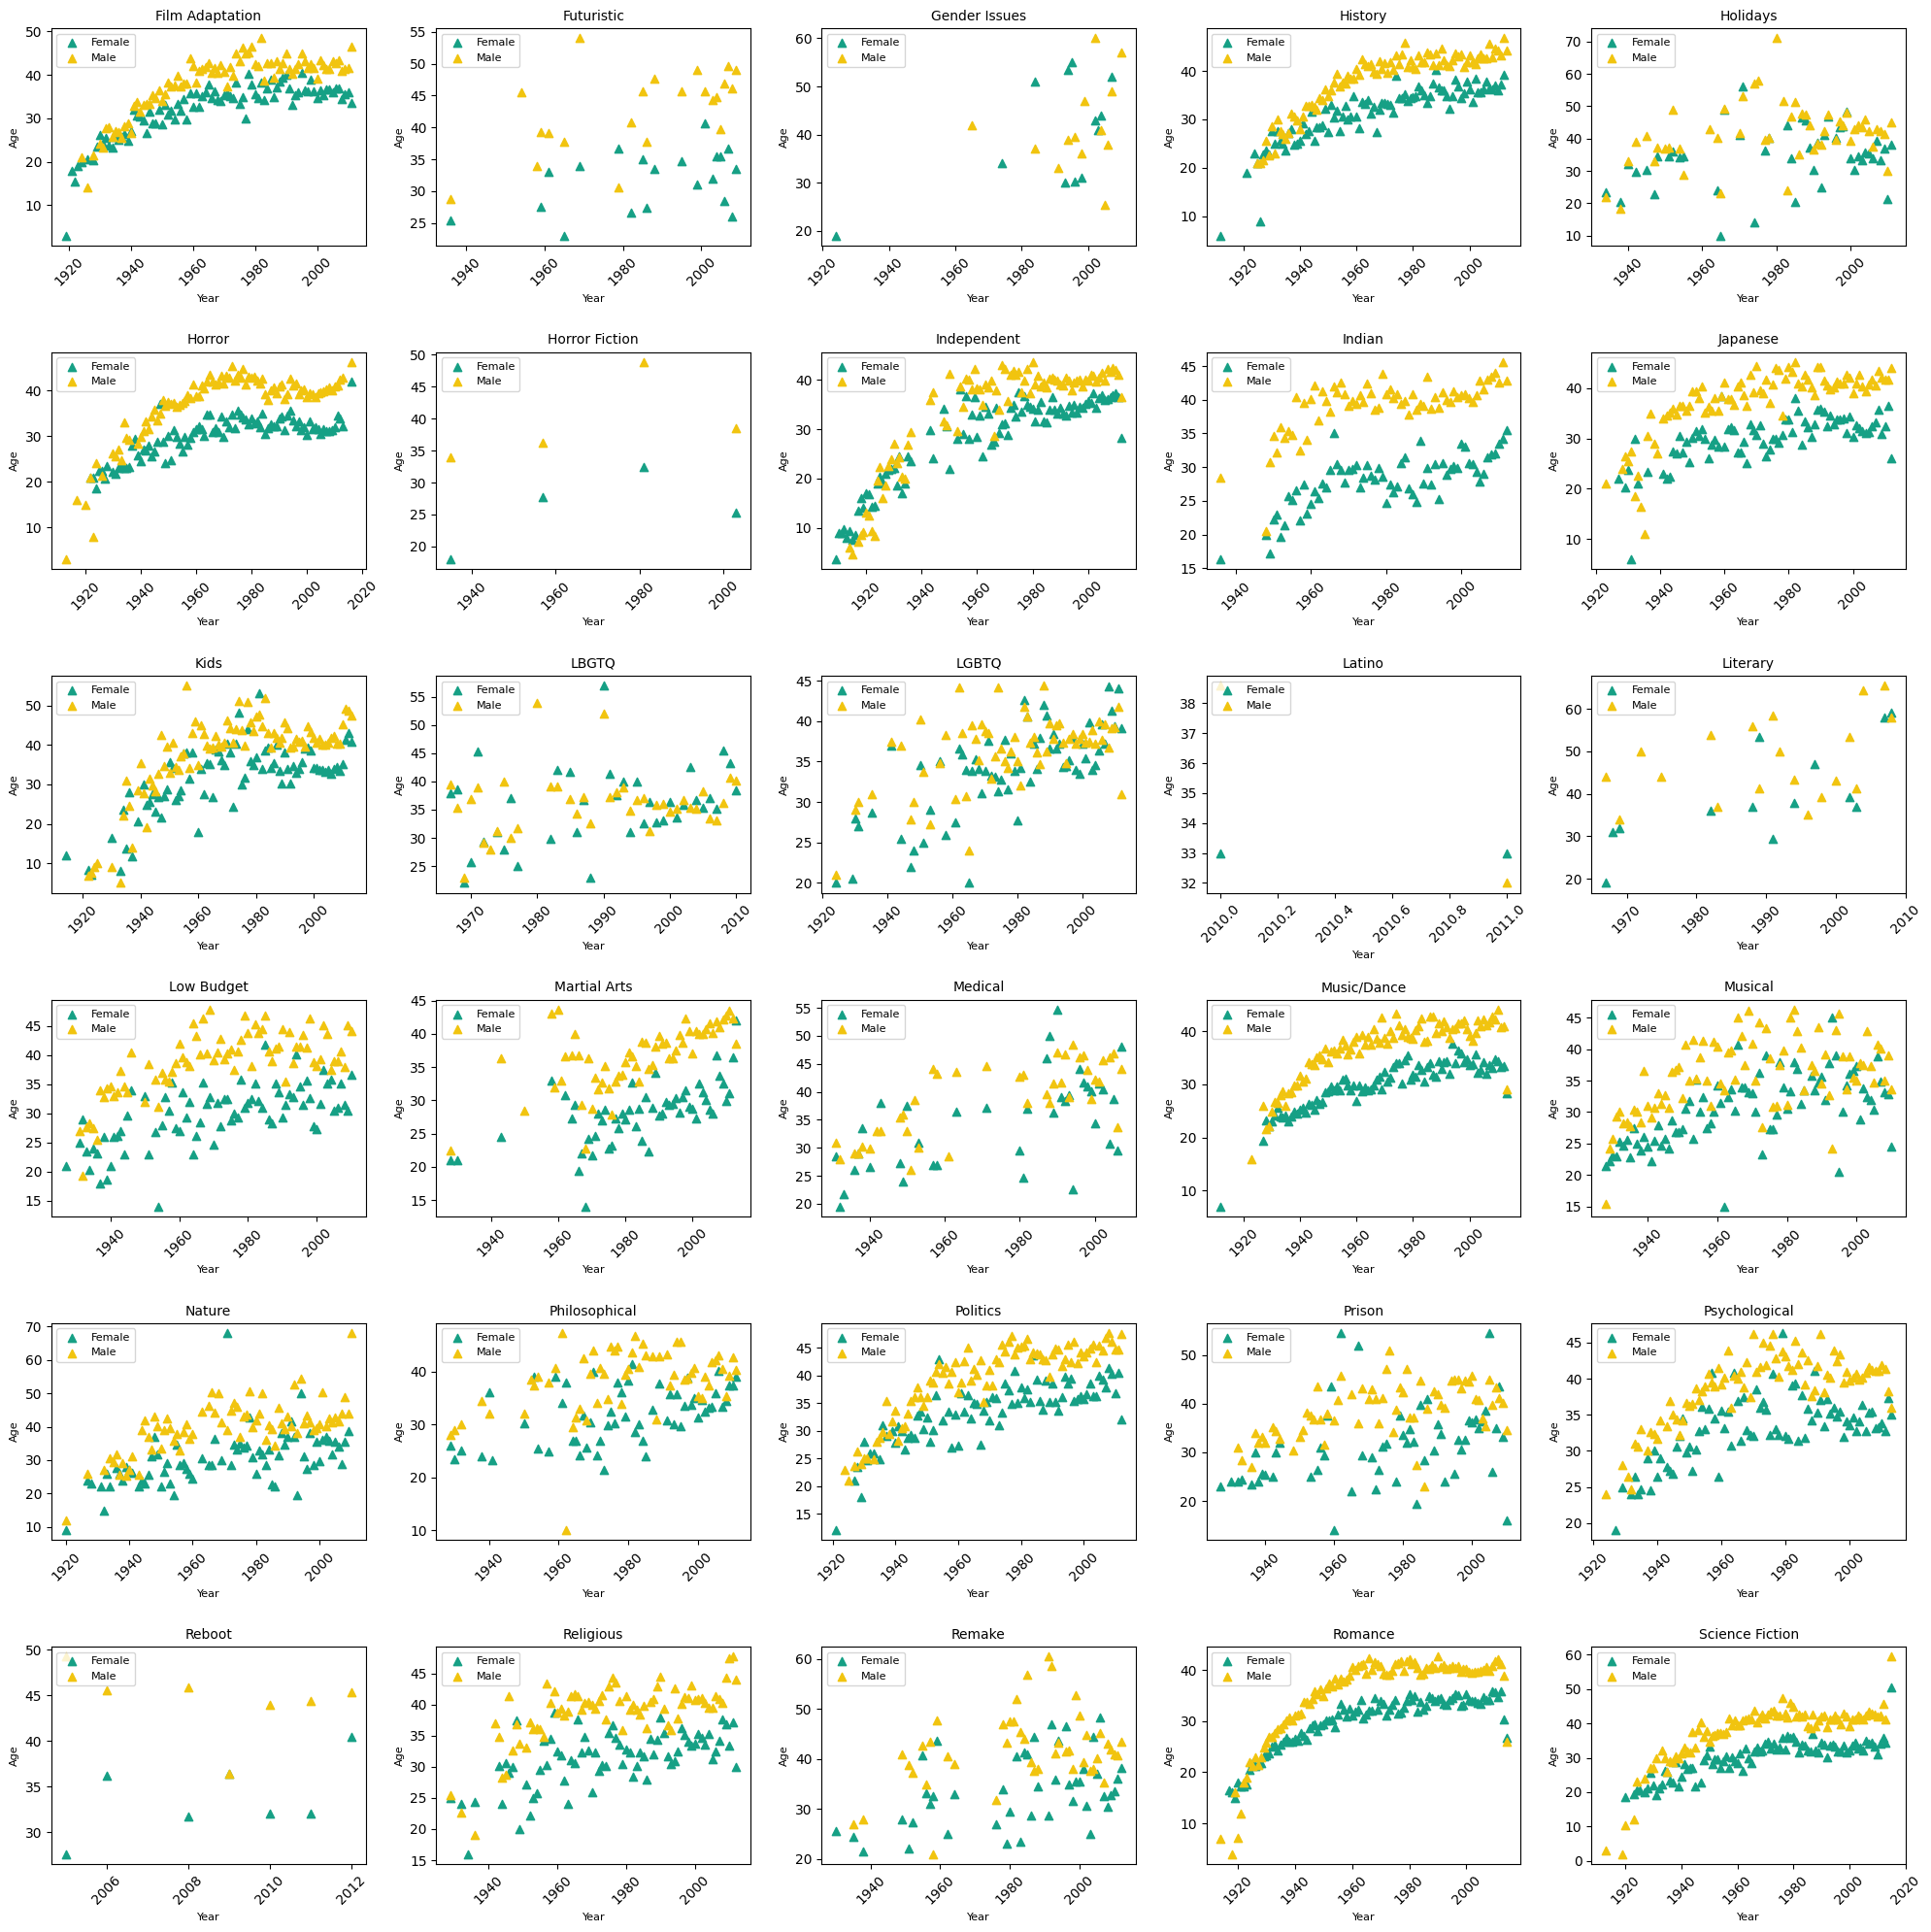

In [106]:
plot_2 = plot_genres(data_for_plots_genre, 30, 60)

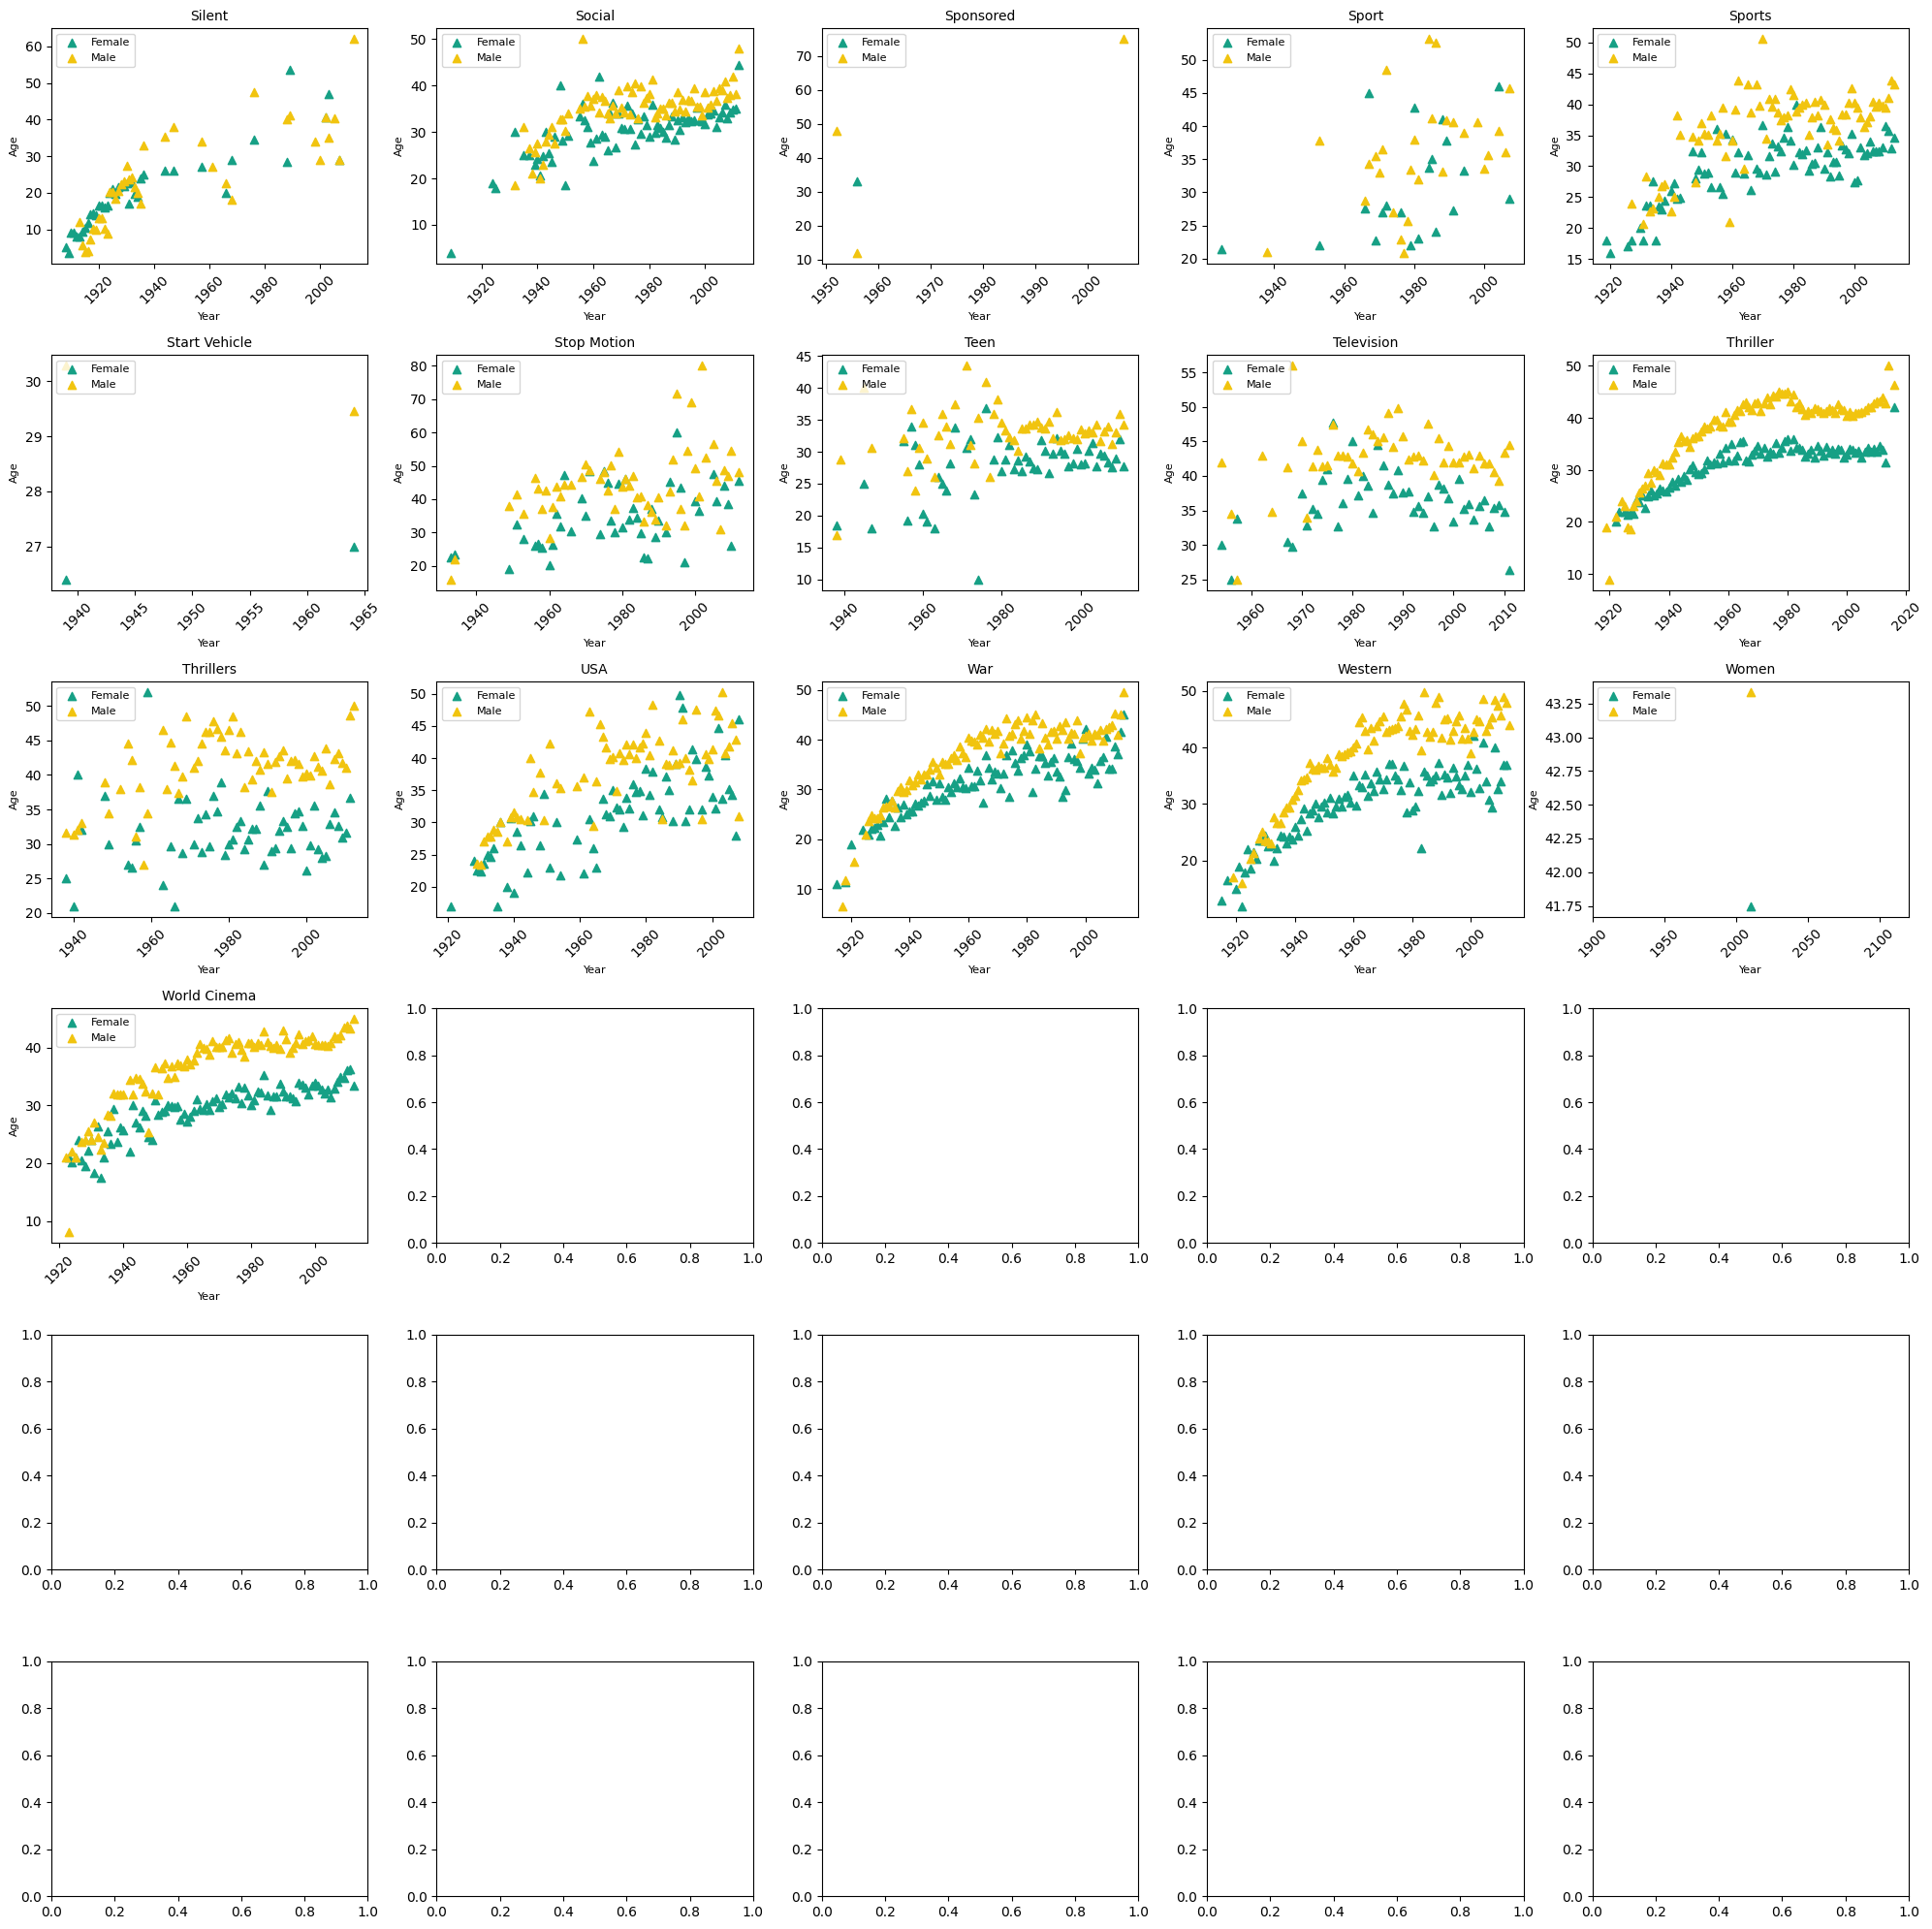

In [107]:
plot_3 = plot_genres(data_for_plots_genre, 61, 77)